# Quantify the effect of GoalLeaning Heuristics

In this notebook, we try to quantify the effect of goal-leaning heuristic and threshold heuristic on the improvement in mission performance. Specifically, we try to calculate the expected reachability time (ERT), defined in this case as the average number of steps to reach a target, for both default basic solver and the proposed heuristics. We support the results obtained in this study with visualizations of instances showing behavior of the agent leading to a near-optimal behavior.

The animate_simulation function below is different from the animate_simulation method available in SingleAgentEnv class. This function, defined in uuvmodel.py, returns the animation, state data, and energy data to help with creating static plots of events of interest. To create these plots, observe the animation below and note down the time steps for frames that one intends to see in the static plot. These time steps can be enteres in the visualize_snapshots function below which creates a figure with subplots showing all the snapshots. 

In [1]:
# setup the notebook
from fimdpenv import setup
setup()

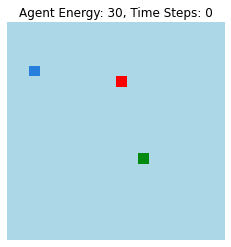

In [2]:
# create test environment
from uuvmodel import create_env
env_basic = create_env('1R-1T-simple', capacity=30)
env_glh = create_env('1R-1T-simple', capacity=30)
env_thv1 = create_env('1R-1T-simple', capacity=30)
env_thv2 = create_env('1R-1T-simple', capacity=30)
env_basic

## Comparison - Basic Solver, Goal-Leaning Heuristic, and Threshold Heuristic

In [3]:
# visualize BasicES and GoalLeaningES
from uuvmodel import animate_simulation, calc_exptimetotarget, visualize_multisnapshots
from fimdp.energy_solvers import GoalLeaningES, BasicES
from fimdp.objectives import AS_REACH, BUCHI, MIN_INIT_CONS, POS_REACH, SAFE

### Default Solver

In [15]:
# Basic Solver 
env_basic.create_counterstrategy(solver=BasicES, objective=BUCHI)
anim, im_basic, energy_basic = animate_simulation(env_basic, num_steps=200)
anim

As you can see in the above visualization, the solution obtained using the default solver, while acting safely, does not try to achieve the optimal path to the agent. Further, for the same reason, the expected reachability time cannot be calculated in this case.

### Goal-Leaning Heuristic

In [19]:
# GoalLeaningES without threshold
env_glh.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=0)
anim, im_glh, energy_glh = animate_simulation(env_glh, num_steps=60)
anim

The above animation shows the solution obtained using Goal-Leaning heuristic. Below, we see that the strategy obtained using this solver has an expected reachability time of about 51 time steps.

#### Expected time steps to target

In [20]:
calc_exptimetotarget(env_glh, num_runs=10000)

51.2724

### Threshold Heuristic with 0.3 threshold

In [21]:
# Threshold Heuristic with 0.2 threshold
env_thv1.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=0.3)
anim, im_thv1, energy_thv1 = animate_simulation(env_thv1, num_steps=50)
anim

The the above animation, we observe a trajectory of an agent following a strategy obtained using the threshold heuristic with a threshold of 0.3. Clearly, the agent takes better path via the nearest reload state to reach the target when compared to the path of agent following strategy from default solver. As a consequence, the expected reachability time is significantly lower in this case (about 20 time steps as seen below).

#### Expected time steps to target

In [22]:
calc_exptimetotarget(env_thv1, num_runs=10000)

19.5327

### Threshold Heuristic with 0.5 threshold

In [23]:
# Threshold Heuristic with 0.5 threshold
env_thv2.create_counterstrategy(solver=GoalLeaningES, objective=BUCHI, threshold=0.5)
anim, im_thv2, energy_thv2 = animate_simulation(env_thv2, num_steps=50)
anim

The the above animation, we observe a trajectory of an agent following a strategy obtained using the threshold heuristic with a threshold of 0.5. Clearly, the agent takes nthe optimal path via nearest reload state to reach the target by taking only strong actions during its entire journey. As a consequence, the expected reachability time is significantly lower in this case (about 15 time steps as seen below).

#### Expected time steps to target

In [24]:
calc_exptimetotarget(env_thv2, num_runs=10000)

15.0

### Visualizing snapshots from different solvers

The code below uses the data obtained from different solves above and provides a snapshot comparing the agent behavior at different time instances for differeny energy-solvers. Users can specify the number of snapshots and the time instances at which the want the snapshots for different solvers.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


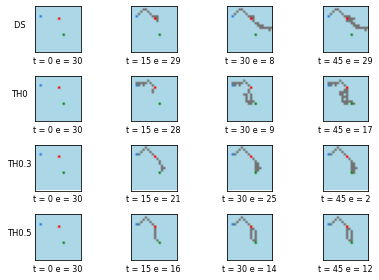

In [26]:
from uuvmodel import visualize_multisnapshots
%load_ext autoreload
%autoreload 2
im_history = [im_basic, im_glh, im_thv1, im_thv2]
energy_history = [energy_basic, energy_glh, energy_thv1, energy_thv2]
snapshot_indices = [[0, 15, 30, 45], [0, 15, 30, 45], [0, 15, 30, 45], [0, 15, 30, 45]]
annotate_names = ['DS', 'TH0', 'TH0.3', 'TH0.5']
visualize_multisnapshots(im_history, energy_history, snapshots_indices=snapshot_indices, annotate=True, annotate_names=annotate_names, filename='temp')